In [14]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
from skimage.feature import local_binary_pattern
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from custom_split import custom_train_test_split


def resize_image(image, target_size=(100, 100)):
    return cv2.resize(image, target_size)

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def normalize_image(image):
    return image / 255.0  # assuming pixel values are in the range [0, 255]

def extract_hog_features(image):
    _, hog_features = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
    hog_features_rescaled = exposure.rescale_intensity(hog_features, in_range=(0, 10))
    return hog_features_rescaled.flatten()

def extract_lbp_features(image):
    lbp_radius = 3
    lbp_points = 8 * lbp_radius
    lbp = local_binary_pattern(image, lbp_points, lbp_radius, method='uniform')
    return lbp.flatten()

def preprocess_dataset(data_dir, min_images_per_folder=20):
    images = []
    labels = []

    for person_name in os.listdir(data_dir):
        person_path = os.path.join(data_dir, person_name)
        if os.path.isdir(person_path):
            # Filter out folders with less than min_images_per_folder images
            if len(os.listdir(person_path)) < min_images_per_folder:
                continue

            for filename in os.listdir(person_path):
                image_path = os.path.join(person_path, filename)
                image = cv2.imread(image_path)

                # Apply preprocessing steps
                image = resize_image(image)
                image = convert_to_grayscale(image)
                image = normalize_image(image)

                # # Extract features (HOG and LBP)
                # hog_features = extract_hog_features(image)
                # lbp_features = extract_lbp_features(image)

                # # Concatenate features
                # features = np.concatenate((hog_features, lbp_features))

                images.append(image)
                labels.append(person_name)

    return np.array(images), np.array(labels)

# Example usage:
data_directory = "D:\Machine Learning\Face-Recognition-System\Dataset\Raw"
images, labels = preprocess_dataset(data_directory)

# Custom stratified train-test split
X_train, X_test, y_train, y_test = custom_train_test_split(images, labels)

# # Train an SVM classifier
# svm_classifier = SVC(kernel='linear', C=1.0)
# svm_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')


In [15]:
# Assuming y_train and y_test are available from the previous code

unique_labels_train = len(set(y_train))
unique_labels_test = len(set(y_test))

print("Total unique labels in y_train:", unique_labels_train)
print("Total unique labels in y_test:", unique_labels_test)


Total unique labels in y_train: 62
Total unique labels in y_test: 62


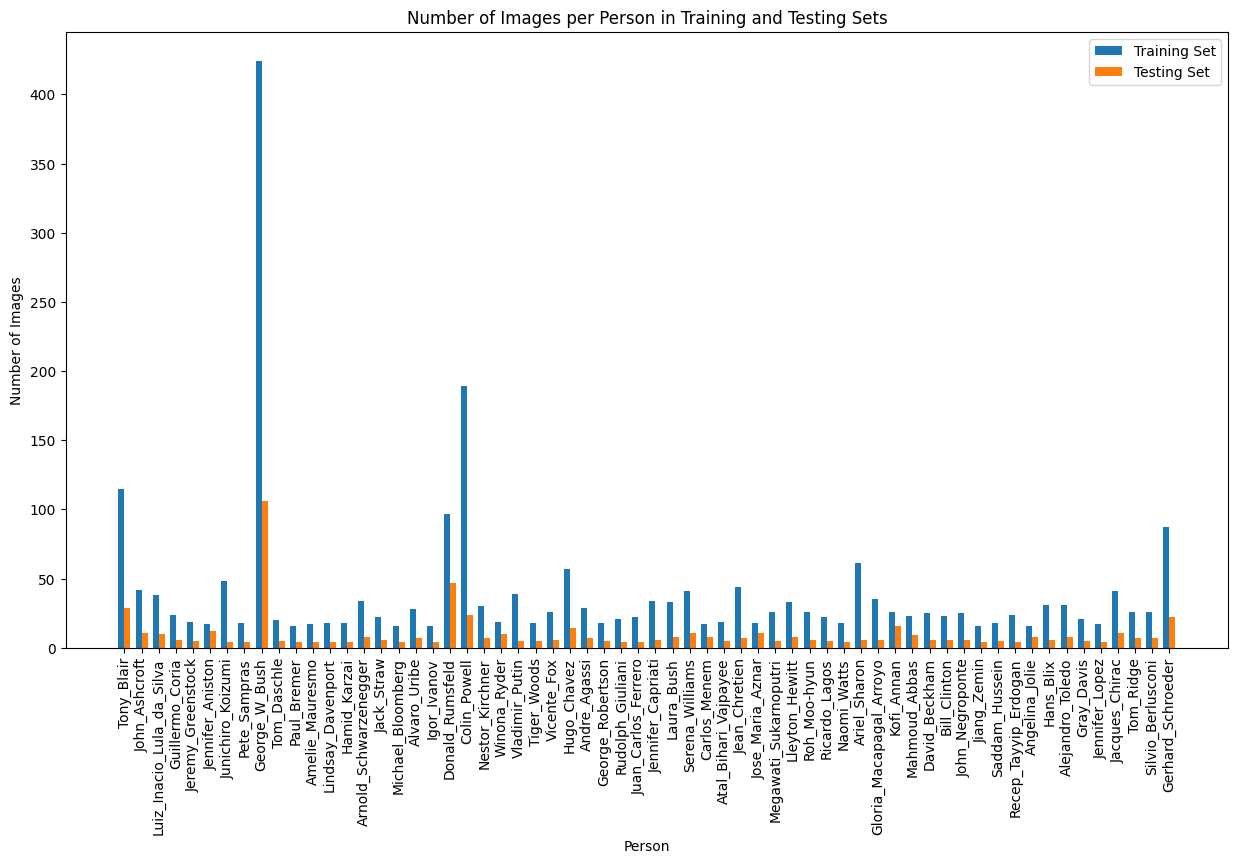

In [16]:
import matplotlib.pyplot as plt

# Count the number of images per person in the training set
train_images_per_person = {label: sum(1 for l in y_train if l == label) for label in set(y_train)}

# Count the number of images per person in the testing set
test_images_per_person = {label: sum(1 for l in y_test if l == label) for label in set(y_test)}

# Create lists of labels and corresponding image counts for plotting
train_labels, train_counts = zip(*train_images_per_person.items())
test_labels, test_counts = zip(*test_images_per_person.items())

# Calculate the number of classes (unique labels)
num_classes = len(train_labels)

# Create an array representing the indices of each class for bar positioning
class_indices = range(num_classes)

# Increase the figure size for a larger plot
plt.figure(figsize=(15, 8))

# Create a bar plot
bar_width = 0.35
plt.bar(class_indices, train_counts, bar_width, label='Training Set')
plt.bar([i + bar_width for i in class_indices], test_counts, bar_width, label='Testing Set')

plt.xlabel('Person')
plt.ylabel('Number of Images')
plt.title('Number of Images per Person in Training and Testing Sets')

# Rotate the person labels vertically
plt.xticks([i + bar_width / 2 for i in class_indices], train_labels, rotation='vertical')

plt.legend()
plt.show()
